In [1]:
import pandas as pd

## Step 2: Read the daily confirmed cases and deaths into two dataframes

In [2]:
urlfile_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

urlfile_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df_confirmed =  pd.read_csv(urlfile_confirmed)
df_deaths =  pd.read_csv(urlfile_deaths)

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178373,178387,178418,178457,178513,178574,178611,178638,178648,178689
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274429,274462,274504,274520,274535,274606,274606,274737,274791,274828
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265738,265739,265739,265741,265746,265746,265754,265761,265761,265767
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,40709,41013,41013,41013,41013,41013
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99287,99287,99287,99287,99287,99287


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7676,7676,7678,7679,7680,7680,7680,7680,7681,7682
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3495,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [5]:
print(df_confirmed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 828 entries, Province/State to 4/24/22
dtypes: float64(2), int64(824), object(2)
memory usage: 1.8+ MB
None


## Step 3: Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

### a) Finding aggregate sum of confirmed cases for all date rows and excluding Province, Country, Latitude, Longitude

#### Pandas Indexing

* Dataframe.[ ] ; This function also known as indexing operator
* Dataframe.loc[ ] : This function is used for labels.
* Dataframe.iloc[ ] : This function is used for positions or integer based
* Dataframe.ix[] : This function is used for both label and integer based

In [6]:
#finding the aggregate sum of confirmed cases on a global level
df_confirmed.agg([sum])

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
sum,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,5669.995846,6192.358524,557,657,944,1437,2120,2929,5580,...,503645731,504198041,504619899,505089291,506082451,507046645,507947338,508708884,509196481,509546470


In [7]:
#transposing the confirmed table, to have date as the index
df_confirmed_transpose = df_confirmed.T
df_confirmed_transpose.head()

df_confirmed_transpose_reduced = df_confirmed_transpose.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis='rows')
df_confirmed_transpose_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [8]:
df_confirmed_transpose_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Columns: 284 entries, 0 to 283
dtypes: object(284)
memory usage: 1.8+ MB


In [9]:
#finding aggregate for all date rows
# Select column 3 to 826 (index 4-827) and find sum
df_confirmed_transpose_reduced['Sum']=df_confirmed_transpose_reduced.iloc[:,0:284].sum(axis=1)
print(df_confirmed_transpose_reduced.tail(10))

              0       1       2      3      4   5     6        7       8  \
4/15/22  178373  274429  265738  40709  99194  11  7535  9059944  422729   
4/16/22  178387  274462  265739  40709  99194  11  7535  9060495  422747   
4/17/22  178418  274504  265739  40709  99194  11  7539  9060923  422762   
4/18/22  178457  274520  265741  40709  99194  11  7539  9060923  422770   
4/19/22  178513  274535  265746  40709  99287  11  7539  9060923  422784   
4/20/22  178574  274606  265746  41013  99287  11  7567  9060923  422799   
4/21/22  178611  274606  265754  41013  99287  11  7567  9060923  422805   
4/22/22  178638  274737  265761  41013  99287  11  7571  9060923  422814   
4/23/22  178648  274791  265761  41013  99287  11  7571  9060923  422822   
4/24/22  178689  274828  265767  41013  99287  11  7571  9060923  422825   

             9  ...     275   276     277       278     279  280    281  \
4/15/22  92330  ...  238214  6109  521946  10394533  656617  535  11817   
4/16/22  9233

In [10]:
df_confirmed_transpose_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Columns: 285 entries, 0 to Sum
dtypes: float64(1), object(284)
memory usage: 1.8+ MB


In [11]:
df_confirmed_transpose_reduced.tail()

,0,1,2,3,4,5,6,7,8,9,...,275,276,277,278,279,280,281,282,283,Sum
4/20/22,178574,274606,265746,41013,99287,11,7567,9060923,422799,96854,...,238367,6458,522056,10502590,656876,535,11818,318640,247336,507046645.0
4/21/22,178611,274606,265754,41013,99287,11,7567,9060923,422805,97825,...,238401,6465,522056,10533164,656876,535,11818,318984,247383,507947338.0
4/22/22,178638,274737,265761,41013,99287,11,7571,9060923,422814,98760,...,238428,6537,522088,10544324,656876,535,11818,318984,247488,508708884.0
4/23/22,178648,274791,265761,41013,99287,11,7571,9060923,422822,99485,...,238442,6793,522121,10554689,656876,535,11818,318984,247524,509196481.0
4/24/22,178689,274828,265767,41013,99287,11,7571,9060923,422825,99485,...,238469,6840,522176,10563502,656876,535,11818,318984,247524,509546470.0


In [12]:
#taking a subset of the dataframe
df_confirmed_s = df_confirmed_transpose_reduced[['Sum']]
df_confirmed_s

column = ['sum_confirmed']
df_confirmed_s.columns = column
df_confirmed_s

,sum_confirmed
1/22/20,557.0
1/23/20,657.0
1/24/20,944.0
1/25/20,1437.0
1/26/20,2120.0
...,...
4/20/22,507046645.0
4/21/22,507947338.0
4/22/22,508708884.0
4/23/22,509196481.0


In [13]:
#Finding sum of all values in the sum column to get total confirmed cases globally
total_confirmed_cases = df_confirmed_s['sum_confirmed'].sum()
print("Total Confirmed Cases = ", total_confirmed_cases)

Total Confirmed Cases =  122997961145.0


### b) Finding aggregate sum of deaths for all date columns and excluding Province, Country, Latitude, Longitude

In [14]:
#transposing the confirmed table, to have date as the index
df_deaths_transpose = df_deaths.T
df_deaths_transpose.head()

df_deaths_transpose_reduced = df_deaths_transpose.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis='rows')
df_deaths_transpose_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_deaths_transpose_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Columns: 284 entries, 0 to 283
dtypes: object(284)
memory usage: 1.8+ MB


In [16]:
#finding aggregate for all date rows
# Select column 3 to 826 (index 4-827) and find sum
df_deaths_transpose_reduced['Sum']=df_deaths_transpose_reduced.iloc[:,0:].sum(axis=1)
print(df_deaths_transpose_reduced.tail(10))

            0     1     2    3     4  5    6       7     8   9  ...   275 276  \
4/15/22  7676  3495  6874  153  1900  0  135  128327  8621  47  ...  1637   7   
4/16/22  7676  3496  6874  153  1900  0  135  128344  8621  47  ...  1637   7   
4/17/22  7678  3496  6874  153  1900  0  135  128344  8621  47  ...  1637   7   
4/18/22  7679  3496  6874  153  1900  0  135  128344  8622  47  ...  1637   7   
4/19/22  7680  3496  6874  153  1900  0  135  128344  8622  47  ...  1637   7   
4/20/22  7680  3496  6874  153  1900  0  135  128344  8622  48  ...  1637   7   
4/21/22  7680  3496  6874  153  1900  0  135  128344  8622  49  ...  1637   7   
4/22/22  7680  3496  6874  153  1900  0  135  128344  8622  50  ...  1637  12   
4/23/22  7681  3496  6874  153  1900  0  135  128344  8622  50  ...  1637  12   
4/24/22  7682  3496  6875  153  1900  0  135  128344  8622  50  ...  1637  12   

          277    278   279 280   281   282   283        Sum  
4/15/22  5700  42924  5656   0  2148  3970  54

In [17]:
df_deaths_transpose_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Columns: 285 entries, 0 to Sum
dtypes: float64(1), object(284)
memory usage: 1.8+ MB


In [18]:
df_deaths_transpose_reduced.tail()

,0,1,2,3,4,5,6,7,8,9,...,275,276,277,278,279,280,281,282,283,Sum
4/20/22,7680,3496,6874,153,1900,0,135,128344,8622,48,...,1637,7,5704,42982,5657,0,2148,3973,5466,6207815.0
4/21/22,7680,3496,6874,153,1900,0,135,128344,8622,49,...,1637,7,5704,42991,5657,0,2148,3974,5467,6211981.0
4/22/22,7680,3496,6874,153,1900,0,135,128344,8622,50,...,1637,12,5705,42998,5657,0,2148,3974,5468,6215610.0
4/23/22,7681,3496,6874,153,1900,0,135,128344,8622,50,...,1637,12,5705,43004,5657,0,2148,3974,5468,6217046.0
4/24/22,7682,3496,6875,153,1900,0,135,128344,8622,50,...,1637,12,5706,43013,5657,0,2149,3974,5468,6218018.0


In [19]:
#taking a subset of the dataframe
df_deaths_s = df_deaths_transpose_reduced[['Sum']]
df_deaths_s

,Sum
1/22/20,17.0
1/23/20,18.0
1/24/20,26.0
1/25/20,42.0
1/26/20,56.0
...,...
4/20/22,6207815.0
4/21/22,6211981.0
4/22/22,6215610.0
4/23/22,6217046.0


In [20]:
column = ['sum_deaths']
df_deaths_s.columns = column
df_deaths_s

,sum_deaths
1/22/20,17.0
1/23/20,18.0
1/24/20,26.0
1/25/20,42.0
1/26/20,56.0
...,...
4/20/22,6207815.0
4/21/22,6211981.0
4/22/22,6215610.0
4/23/22,6217046.0


In [21]:
#Finding sum of all values in the sum column to get total confirmed deaths globally
total_deaths = df_deaths_s['sum_deaths'].sum()
print("Total Deaths = ", total_deaths)

Total Deaths =  2311539432.0


In [22]:
#concatenating the index(date), sum of confirmed cases and deaths
aggregate_df = pd.concat([df_confirmed_s['sum_confirmed'], df_deaths_s['sum_deaths']], axis=1)
aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  824 non-null    float64
 1   sum_deaths     824 non-null    float64
dtypes: float64(2)
memory usage: 19.3+ KB


In [23]:
aggregate_df.head()

,sum_confirmed,sum_deaths
1/22/20,557.0,17.0
1/23/20,657.0,18.0
1/24/20,944.0,26.0
1/25/20,1437.0,42.0
1/26/20,2120.0,56.0


In [24]:
aggregate_df.tail()

,sum_confirmed,sum_deaths
4/20/22,507046645.0,6207815.0
4/21/22,507947338.0,6211981.0
4/22/22,508708884.0,6215610.0
4/23/22,509196481.0,6217046.0
4/24/22,509546470.0,6218018.0


In [25]:
aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1/22/20 to 4/24/22
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  824 non-null    float64
 1   sum_deaths     824 non-null    float64
dtypes: float64(2)
memory usage: 19.3+ KB


In [26]:
aggregate_df = aggregate_df.reset_index()
aggregate_df

,index,sum_confirmed,sum_deaths
0,1/22/20,557.0,17.0
1,1/23/20,657.0,18.0
2,1/24/20,944.0,26.0
3,1/25/20,1437.0,42.0
4,1/26/20,2120.0,56.0
...,...,...,...
819,4/20/22,507046645.0,6207815.0
820,4/21/22,507947338.0,6211981.0
821,4/22/22,508708884.0,6215610.0
822,4/23/22,509196481.0,6217046.0


In [27]:
columns_1 = ['date', 'sum_confirmed', 'sum_deaths']
aggregate_df.columns = columns_1
aggregate_df

,date,sum_confirmed,sum_deaths
0,1/22/20,557.0,17.0
1,1/23/20,657.0,18.0
2,1/24/20,944.0,26.0
3,1/25/20,1437.0,42.0
4,1/26/20,2120.0,56.0
...,...,...,...
819,4/20/22,507046645.0,6207815.0
820,4/21/22,507947338.0,6211981.0
821,4/22/22,508708884.0,6215610.0
822,4/23/22,509196481.0,6217046.0


In [28]:
aggregate_df['date']

0      1/22/20
1      1/23/20
2      1/24/20
3      1/25/20
4      1/26/20
        ...   
819    4/20/22
820    4/21/22
821    4/22/22
822    4/23/22
823    4/24/22
Name: date, Length: 824, dtype: object

In [29]:
from datetime import datetime

#aggregate_df['date'] = pd.to_datetime(aggregate_df['date'])

aggregate_df['date'] = aggregate_df['date'].astype(str)
aggregate_df['date'] = pd.to_datetime(aggregate_df['date'].astype(str))
aggregate_df['date']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
819   2022-04-20
820   2022-04-21
821   2022-04-22
822   2022-04-23
823   2022-04-24
Name: date, Length: 824, dtype: datetime64[ns]

In [30]:
aggregate_df.set_index('date', inplace=True)
aggregate_df

,sum_confirmed,sum_deaths
date,,
2020-01-22,557.0,17.0
2020-01-23,657.0,18.0
2020-01-24,944.0,26.0
2020-01-25,1437.0,42.0
2020-01-26,2120.0,56.0
...,...,...
2022-04-20,507046645.0,6207815.0
2022-04-21,507947338.0,6211981.0
2022-04-22,508708884.0,6215610.0


In [31]:
aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824 entries, 2020-01-22 to 2022-04-24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  824 non-null    float64
 1   sum_deaths     824 non-null    float64
dtypes: float64(2)
memory usage: 19.3 KB


### Step 4: Research stock for the 5 industries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://pypi.org/project/alpha-vantage/

In [33]:
from alpha_vantage.timeseries import TimeSeries 

In [34]:
#store the API key
ts = TimeSeries(key='DAXRSK4WN54W5H09', output_format='pandas')

### Getting the stock data

In [35]:
#symbol - the ticker of the stock

List of tickers for stock selected
Juliet

* Overall American Market - AEM Agnico Eagle Mines Ltd
* Overall Canadian Market 
* Travel sector - TZOO Travelzoo
* The Real Estate sector - BAM Brookfield Asset Management Inc - Class A
* Precious metals (Gold, Silver, Platinum, etc) - AEM Agnico Eagle Mines Ltd

Diana

* american company:  AAPL - apple
* canadina company: SHOP.TRT - shopify
* precious metals - GFI  - Gold Fields Ltd
* real estate : CIGI - Colliers International Group Stock
* travel sector : BKNG -  Booking Holdings Inc

In [36]:
#getting the stock data
data_apple, meta_apple = ts.get_intraday('AAPL', interval="1min", outputsize="full")

In [37]:
#to replace***
#getting the stock data
#data_shopify, meta_shopify = ts.get_intraday('GS.TO', interval="1min", outputsize="full")

In [38]:
#getting the stock data
data_gold, meta_gold = ts.get_intraday('GFI', interval="1min", outputsize="full")

In [39]:
#getting the stock data
data_colliers, meta_colliers = ts.get_intraday('CIGI', interval="1min", outputsize="full")

In [40]:
#getting the stock data
data_booking, meta_booking = ts.get_intraday('BKNG', interval="1min", outputsize="full")

### Examining the stock data

In [41]:
#Examine data
meta_apple

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2022-04-22 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [42]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7087 entries, 2022-04-22 20:00:00 to 2022-04-11 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    7087 non-null   float64
 1   2. high    7087 non-null   float64
 2   3. low     7087 non-null   float64
 3   4. close   7087 non-null   float64
 4   5. volume  7087 non-null   float64
dtypes: float64(5)
memory usage: 332.2 KB


In [43]:
data_apple.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-22 20:00:00,161.52,161.52,161.40,161.50,1893.0
2022-04-22 19:59:00,161.50,161.50,161.40,161.50,3928.0
2022-04-22 19:58:00,161.50,161.50,161.50,161.50,794.0
2022-04-22 19:57:00,161.50,161.50,161.49,161.49,1758.0
2022-04-22 19:55:00,161.47,161.48,161.46,161.46,1413.0


### Step 5: Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

In [44]:
#renaming the columns
columns = ['open', 'high', 'low', 'close', 'volume']
data_apple.columns = columns

In [45]:
data_apple['date'] = data_apple.index.date
data_apple['time'] = data_apple.index.time

In [46]:
data_apple.head

<bound method NDFrame.head of                        open    high     low   close  volume        date  \
date                                                                      
2022-04-22 20:00:00  161.52  161.52  161.40  161.50  1893.0  2022-04-22   
2022-04-22 19:59:00  161.50  161.50  161.40  161.50  3928.0  2022-04-22   
2022-04-22 19:58:00  161.50  161.50  161.50  161.50   794.0  2022-04-22   
2022-04-22 19:57:00  161.50  161.50  161.49  161.49  1758.0  2022-04-22   
2022-04-22 19:55:00  161.47  161.48  161.46  161.46  1413.0  2022-04-22   
...                     ...     ...     ...     ...     ...         ...   
2022-04-11 04:05:00  168.92  168.93  168.92  168.93  1316.0  2022-04-11   
2022-04-11 04:04:00  168.81  168.89  168.80  168.80  4075.0  2022-04-11   
2022-04-11 04:03:00  168.81  168.94  168.80  168.94  1170.0  2022-04-11   
2022-04-11 04:02:00  169.00  169.00  168.85  168.85  1675.0  2022-04-11   
2022-04-11 04:01:00  168.99  169.81  168.99  169.00  7170.0  2022-04-1

In [47]:
#limiting the data to working hours trading
market_apple = data_apple.between_time('09:30:00', '16:00:00').copy()
market_apple.sort_index(inplace=True)
market_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2022-04-11 09:30:00 to 2022-04-22 16:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3519 non-null   float64
 1   high    3519 non-null   float64
 2   low     3519 non-null   float64
 3   close   3519 non-null   float64
 4   volume  3519 non-null   float64
 5   date    3519 non-null   object 
 6   time    3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


In [48]:
market_apple.index.name = None

In [49]:
df_apple = market_apple.groupby('date').agg({'low':min, 'high':max})
df_apple

,low,high
date,,
2022-04-11,165.50,169.0300
2022-04-12,166.64,169.8700
2022-04-13,166.77,171.0400
2022-04-14,165.04,171.2700
2022-04-18,163.57,166.5984
2022-04-19,163.91,167.8200
2022-04-20,166.10,168.9800
2022-04-21,165.91,171.5300
2022-04-22,161.50,167.8699


In [50]:
#print(market_apple)
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2022-04-11 to 2022-04-22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     9 non-null      float64
 1   high    9 non-null      float64
dtypes: float64(2)
memory usage: 216.0+ bytes


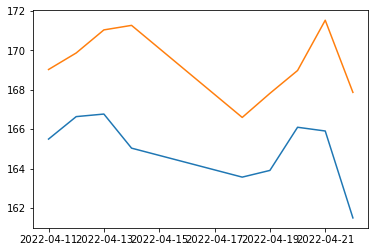

In [51]:
plt.plot(df_apple[["low", "high"]])

#### Combining the COVID confirmed cases and deaths from *aggregate_df*

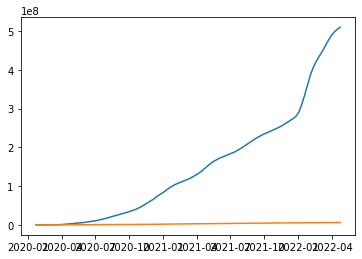

In [52]:
plt.plot(aggregate_df[['sum_confirmed', 'sum_deaths']])

### Step 6:  Append that info to the data frame created in step 3)

In [65]:
#concatenating the sum of confirmed cases and deaths, low and high for apple
aggregate_apple_df = pd.concat([aggregate_df, df_apple], axis=0)
aggregate_apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 2020-01-22 00:00:00 to 2022-04-22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  824 non-null    float64
 1   sum_deaths     824 non-null    float64
 2   low            9 non-null      float64
 3   high           9 non-null      float64
dtypes: float64(4)
memory usage: 32.5+ KB


In [66]:
aggregate_apple_df.head()

,sum_confirmed,sum_deaths,low,high
date,,,,
2020-01-22 00:00:00,557.0,17.0,NaN,NaN
2020-01-23 00:00:00,657.0,18.0,NaN,NaN
2020-01-24 00:00:00,944.0,26.0,NaN,NaN
2020-01-25 00:00:00,1437.0,42.0,NaN,NaN
2020-01-26 00:00:00,2120.0,56.0,NaN,NaN


In [67]:
aggregate_apple_df.tail()

,sum_confirmed,sum_deaths,low,high
date,,,,
2022-04-18,NaN,NaN,163.57,166.5984
2022-04-19,NaN,NaN,163.91,167.8200
2022-04-20,NaN,NaN,166.10,168.9800
2022-04-21,NaN,NaN,165.91,171.5300
2022-04-22,NaN,NaN,161.50,167.8699


In [68]:
aggregate_apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 2020-01-22 00:00:00 to 2022-04-22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  824 non-null    float64
 1   sum_deaths     824 non-null    float64
 2   low            9 non-null      float64
 3   high           9 non-null      float64
dtypes: float64(4)
memory usage: 32.5+ KB


In [57]:
#cleaning the data - dropping rows with empty cells
aggregate_apple_df_clean = aggregate_apple_df.dropna()
aggregate_apple_df_clean.reset_index(drop=True, inplace=True)
aggregate_apple_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_confirmed  9 non-null      float64
 1   sum_deaths     9 non-null      float64
 2   low            9 non-null      float64
 3   high           9 non-null      float64
dtypes: float64(4)
memory usage: 416.0 bytes


### Step 7: Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib

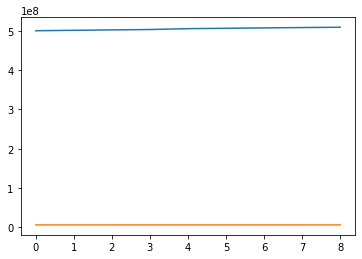

In [58]:
plt.plot(aggregate_apple_df_clean[['sum_confirmed', 'sum_deaths']])
